# Simulación 7
García. Los clientes llegan a un banco según un proceso de Poisson con media de 180 por hora. Seis cajeros atienden a los clientes, quienes tienen la opción de realizar una de cuatro diferentes transacciones.

La probabilidad de realizar cada una de las transacciones y su tiempo medio de servicio se muestran en la siguiente tabla; en cada categoría el tiempo de servicio está distribuido exponencialmente y no se puede realizar más de un tipo de transacción por servicio.

Se ofrecen dos alternativas para hacer colas:
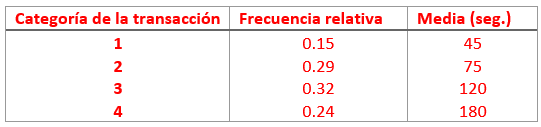

a) Los clientes forman una sola cola y cuando un cajero está disponible, la persona al frente de la cola pasa a ser atendido.

b) Colas separadas para cada cajero. Si un cajero está libre cuando un cliente llega, el cliente recibe servicio con ese cajero. De otra manera, el cliente va la cola que tenga menos gente. Después de esto, el cliente espera según un proceso PEPS hasta que pueda realizar su transacción y después sale del banco.

Construya un modelo de simulación y corra el modelo por 8 horas; compare los resultados de las dos alternativas de hacer fila. ¿Cuál de las dos alternativas reduce el tiempo de espera y por qué?

Librerías

In [18]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

Parámetros de las simulaciones

In [19]:
hours_simulation = 8 # Total time of simulation
simulation_time_seconds = hours_simulation*60*60

clients_per_hour = 180
mean_interarrival_seconds = 60*60/clients_per_hour

bank_tellers = 6 # Número de cajeros atendiendo en el banco

# Escenario A

# Escenario B

In [30]:
hours_simulation = 8 # Total time of simulation
seconds_simulation = hours_simulation*60*60

clients_per_hour = 180
mean_interarrival_seconds = 60*60/clients_per_hour

In [31]:
def expon(mean):
        return (-mean * np.log(np.random.uniform(0,1)))

class Client:
    def __init__(self,env,selected_teller,name,transaction_type):

        self.env = env
        self.selected_teller = selected_teller
        self.name = name
        self.transaction_type = transaction_type


    def in_turn(self):
        transaction_time = 0

        if self.transaction_type == 1:
            transaction_time = expon(45)
        elif self.transaction_type == 2:
            transaction_time = expon(75)
        elif self.transaction_type == 3:
            transaction_time = expon(120)
        else:  # transaction_type == 4:
            transaction_time = expon(180)
        
        yield self.env.timeout(transaction_time)


    def action(self):

        self.arrival_time = env.now
        # print(f"{self.arrival_time} - {self.name}: Llegada al banco") # quitar luego


        with self.selected_teller.request() as req:
            yield req
            client_delay_in_q = env.now-self.arrival_time
            # print(f"{self.env.now} - {self.name}: Inicio de turno")
            # print(f"Retraso {self.name} = {client_delay_in_q}")

            # delay_in_q +=client_delay_in_q
            print(client_delay_in_q)
            # clients_served += 1

            # print(f"Tipo de transaccion {self.name} = {self.transaction_type}")
            yield from self.in_turn() # Transcurre el tiempo de servicio del turnpo
            # print(f"{self.env.now} - {self.name}: Termina turno") # quitar luego


def client_generator(env,tellers_list):
    i = 1
    while True:
        interarrival_time = expon(mean_interarrival_seconds)
        transaction_type = np.random.choice([1, 2, 3, 4], p=[0.15, 0.29, 0.32, 0.24])
        yield env.timeout(interarrival_time)

        # Elegir cajero donde hacer fila
        filas=[]
        for teller in tellers_list:
            filas.append(len(teller.queue)) 
        
        shortest_queue_index= 0
        shortest_queue_length =filas[0] 
        
        for i in range (0,len(filas)):
            if filas[i]<shortest_queue_length:
                shortest_queue_index=i
                shortest_queue_length=filas[i]
                # print(min,min_length)
        # print("------------------")
        selected_teller = tellers_list[shortest_queue_index]
        # print(f"Selected teller: {min}, longitud_fila: {min_length}")

        # if len(teller2.queue)<len(teller1.queue):
        #     selected_teller=teller2
        # else:
        #     selected_teller=teller1

        client = Client(env,selected_teller,name=f"Cliente {i}",transaction_type=transaction_type)
        env.process(client.action())
        i+=1


np.random.seed(0)

env = simpy.Environment()
tellers_list = []
num_tellers = 1
for i in range (0,num_tellers):
    tellers_list.append(simpy.Resource(env,1))

# teller1=simpy.Resource(env,1)
# teller2=simpy.Resource(env,1)
env.process(client_generator(env,tellers_list))
# env.process(client_generator(env,bank))
env.run(until=seconds_simulation)

0.0
92.93574553405891
106.17472459283128
249.56708791127414
302.3104002031041
390.690368041673
553.929698311697
556.6815127747989
658.0941771199609
691.4312501444873
911.6395734609159
943.6900769543618
1044.1721813407073
1066.9504777799423
1061.919371645399
1278.7185365989094
1336.4214478725642
1454.3446251884793
1656.371954836098
1668.808665014257
1707.4545926963515
1813.0037215692028
1828.4655377659255
1885.7106398151152
2204.462530806091
2172.504737547696
2184.1435758029015
2183.472705625701
2260.98248802204
2237.263237170794
2345.4205478406184
2432.8414575927013
2518.660873947166
2565.8817059787334
2629.9830695814185
2664.9764517297845
2651.328437735608
2644.9594424487113
2648.9402704052777
2784.324778210744
3081.031844850024
3301.540118675151
3791.390553301339
3881.8186530488774
3945.1036965252647
3851.424380559373
3891.4607050167297
3934.0514615209863
3933.2986057592398
4349.302560961988
4339.0051605414055
4340.684043673213
4426.853908025635
4485.8508945601425
4650.944090238438
4